# Лабараторная работа №3 часть 2

## Обработка данных

### импорт библиотек и загрузка данных

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

titanic_data = pd.read_csv('Titanic.csv')

### Удаленние данных

In [ ]:
titanic_cleaned = titanic_data.copy()
titanic_cleaned = titanic_cleaned.drop(['Name','PassengerId', 'Ticket', 'Cabin'], axis=1)
titanic_cleaned = titanic_cleaned.dropna()

print(titanic_cleaned.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


### перекодировка

In [50]:
titanic_cleaned['Sex'] = titanic_cleaned['Sex'].map({'male': 0, 'female': 1})
titanic_cleaned['Embarked'] = titanic_cleaned['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
print(titanic_cleaned.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         3
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         3
3         1       1    1  35.0      1      0  53.1000         3
4         0       3    0  35.0      0      0   8.0500         3


### вычисление процента потерянных данных и вывод первых строк датасета

In [51]:
initial_rows = titanic_data.shape[0]
cleaned_rows = titanic_cleaned.shape[0]
lost_percentage = ((initial_rows - cleaned_rows) / initial_rows) * 100
print(f"Процент потерянных данных: {lost_percentage:.2f}%")

titanic_cleaned.head()

Процент потерянных данных: 20.09%


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3


## Машинное обучение

### Разбиение на обучающую и тестовые выборки

In [52]:
X = titanic_cleaned.drop('Survived', axis=1)
y = titanic_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### решение задачи классификации

In [56]:
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### предсказание и оценка точности

In [61]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.80


### оценка влияния признака Embarked

In [76]:
X_no_embarked = X.drop('Embarked', axis=1)
X_train_no_emb, X_test_no_emb, y_train_no_emb, y_test_no_emb = train_test_split(
    X_no_embarked, y, test_size=0.3, random_state=42)
clf_no_emb = LogisticRegression(random_state=0, max_iter=1000)
clf_no_emb.fit(X_train_no_emb, y_train_no_emb)
y_pred_no_emb = clf_no_emb.predict(X_test_no_emb)
accuracy_no_emb = accuracy_score(y_test_no_emb, y_pred_no_emb)
print(f"\nТочность без признака 'Embarked': {accuracy_no_emb:.4f}")
print(f"Изменение точности: {accuracy_score(y_test, y_pred) - accuracy_no_emb:.4f}")


Точность без признака 'Embarked': 0.8037
Изменение точности: -0.0047


# Лабараторная работа №3 часть 3

## Задание 1

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (precision_score, recall_score, 
                            f1_score, confusion_matrix, precision_recall_curve,
                            roc_curve, auc, PrecisionRecallDisplay, RocCurveDisplay)


### дополнительные метрики

In [67]:
print("\nДополнительные метрики качества модели:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")


Дополнительные метрики качества модели:
Accuracy: 0.7991
Precision: 0.8101
Recall: 0.6957
F1-score: 0.7485


### матрица ошибок

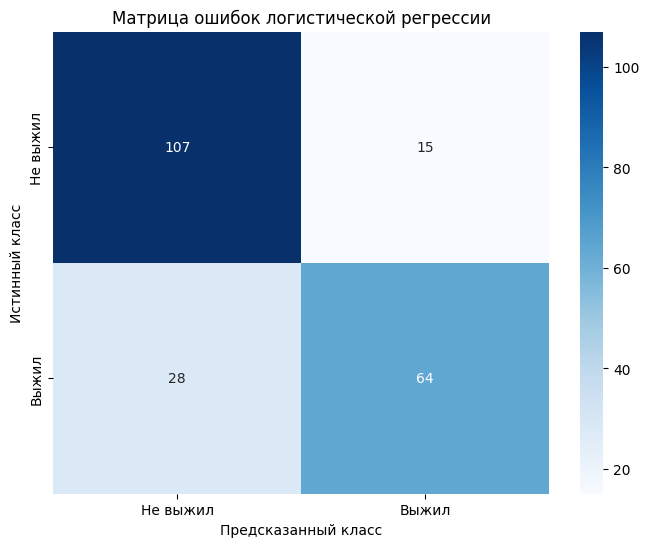

In [68]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Не выжил', 'Выжил'],
            yticklabels=['Не выжил', 'Выжил'])
plt.title('Матрица ошибок логистической регрессии')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()


### кривые PR и ROC

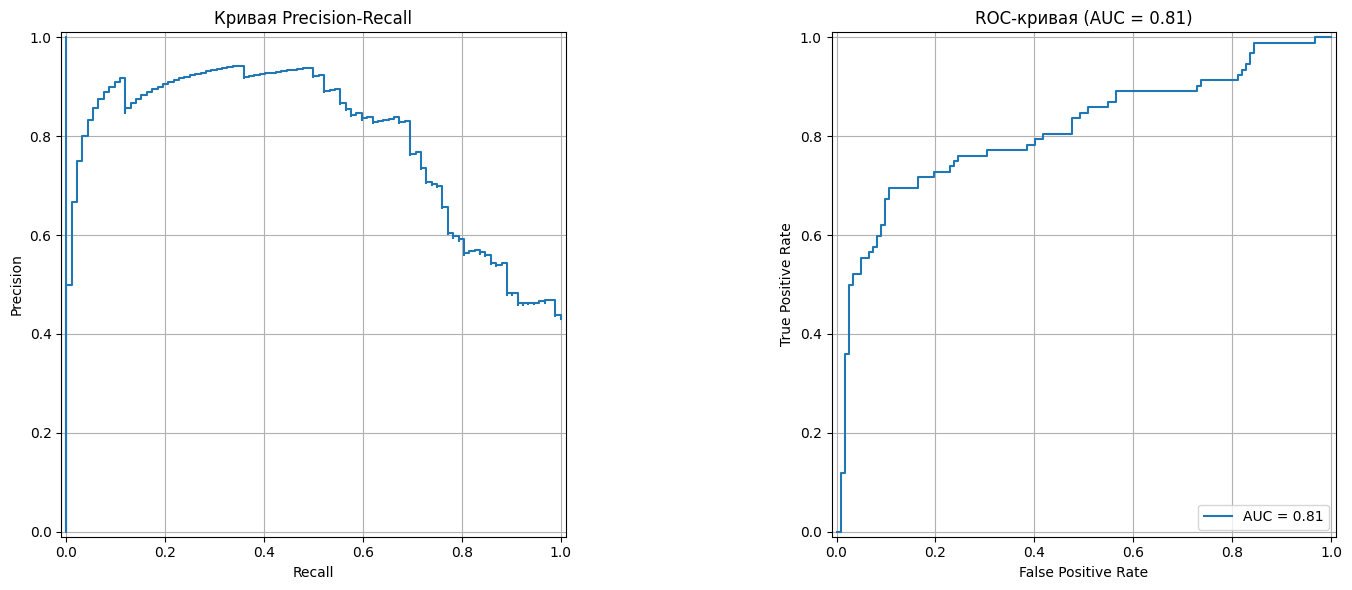

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

precision, recall, _ = precision_recall_curve(y_test, y_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot(ax=ax1)
ax1.set_title('Кривая Precision-Recall')
ax1.grid(True)

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
disp.plot(ax=ax2)
ax2.set_title('ROC-кривая (AUC = {:.2f})'.format(roc_auc))
ax2.grid(True)

plt.tight_layout()
plt.show()

### вывод о качестве полученной модели


In [ ]:
print("\nВажность признаков (коэффициенты модели):")
for feature, coef in zip(X.columns, clf.coef_[0]):
    print(f"{feature}: {coef:.4f}")
    


Важность признаков (коэффициенты модели):
Pclass: -1.4368
Sex: 2.6232
Age: -0.0393
SibSp: -0.2801
Parch: 0.0303
Fare: -0.0001
Embarked: -0.1303


модель правильно предсказывает судьбу пассажиров в 80% случаев. Хорошее качество классификации ROC > 0.80. Модель лучше предсказывает смерть, чем выживание. В вопросе выживания наибольшее значение имеет пол пассажира. Признак Embarked имеет незначительное влияние. В итоге модель имеет хорошее качество.

## Задание 2

In [78]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

### Модель опорных векторов

In [79]:
svm_pipe = make_pipeline(
    StandardScaler(),
    SVC(probability=True, random_state=42)
)
svm_pipe.fit(X_train, y_train)
y_pred_svm = svm_pipe.predict(X_test)
y_proba_svm = svm_pipe.predict_proba(X_test)[:, 1]

### Модель k-бижайших соседей

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

### Сравнение метрик


Сравнение моделей:
                     Accuracy  Precision    Recall        F1   AUC-ROC
Model                                                                 
Logistic Regression  0.799065   0.810127  0.695652  0.748538  0.812188
SVM                  0.808411   0.849315  0.673913  0.751515  0.826889
KNN                  0.621495   0.556701  0.586957  0.571429  0.677432


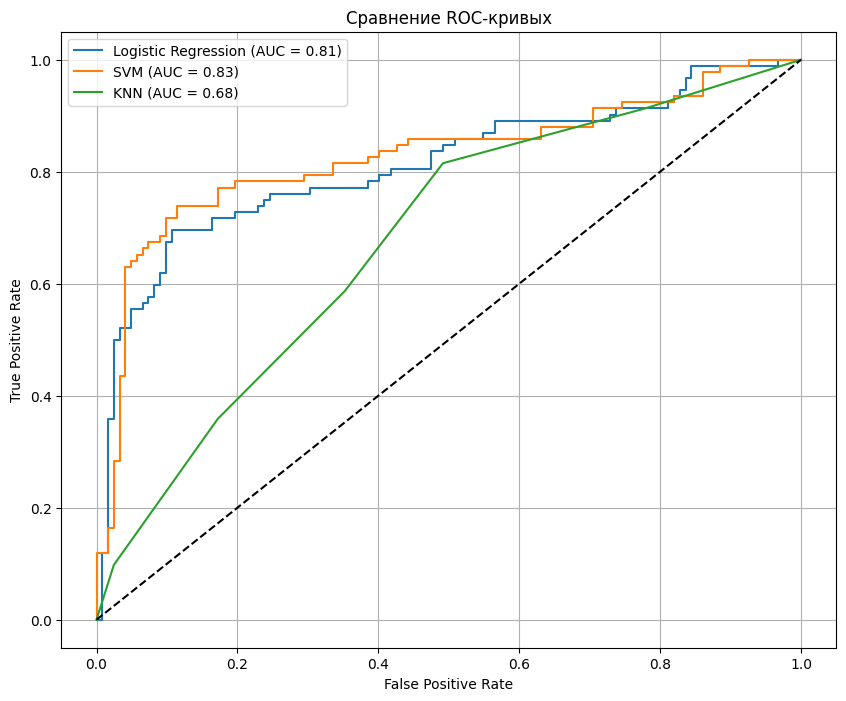

In [82]:
models = {
    'Logistic Regression': (y_pred, y_proba),
    'SVM': (y_pred_svm, y_proba_svm),
    'KNN': (y_pred_knn, y_proba_knn)
}

print("\nСравнение моделей:")
results = []
for name, (pred, proba) in models.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1': f1_score(y_test, pred),
        'AUC-ROC': auc(*roc_curve(y_test, proba)[:2])
    })

results_df = pd.DataFrame(results).set_index('Model')
print(results_df)

plt.figure(figsize=(10, 8))
for name, (_, proba) in models.items():
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Сравнение ROC-кривых')
plt.legend()
plt.grid(True)
plt.show()

**Логистическая регрессия** является оптимальным выбором для данного набора данных, демонстрируя наилучшую точность